In [43]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [44]:
%matplotlib inline

(4035, 3923)


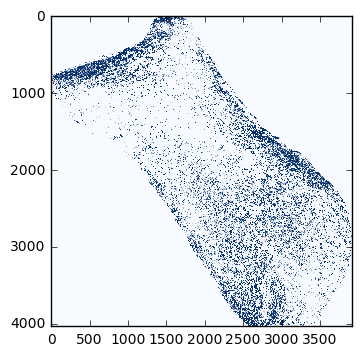

In [72]:
# 1. DEM of the hillslope (HillslopeDEM.tif).
ds = gdal.Open("HillslopeOnlyVeg.tif")
dem = np.array(ds.GetRasterBand(1).ReadAsArray())
plt.figure(figsize = ())
plt.imshow(dem, cmap='Blues')
print dem.shape

In [77]:
nrows, ncols = dem.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
# x0 = 0; 
# y0 = 0;
# x1 = x0 + dx * ncols
# y1 = y0 + dy * nrows
print "dem: dx={0:.1f}, dy ={1:.1f}, x0={2:.1f} , y0={3:.1f} ".format(dx, dy, x0, y0)
# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

dem: dx=0.1, dy =-0.1, x0=183434.5 , y0=585054.3 


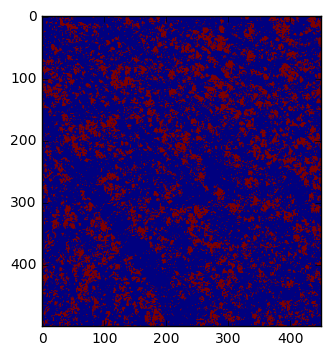

In [55]:
plt.imshow(dem[2500:3000, 2550:3000])

In [47]:
#  A slope inclination layer (Dem_Slope.tif)
ds = gdal.Open("Dem_Slope.tif")
slope = np.array(ds.GetRasterBand(1).ReadAsArray())
slope[slope<-1] = np.nan
print slope.shape

(798, 785)


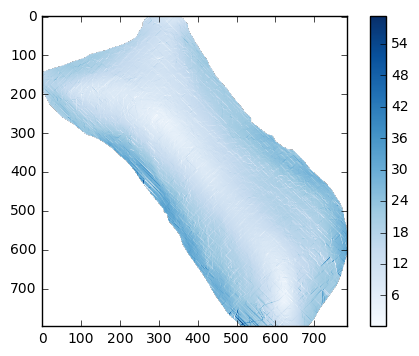

In [51]:
plt.imshow(slope, cmap='Blues')
plt.colorbar()

slope: dx=0.5, dy =-0.5, x0=183434.578039 , y0=585050.457243 


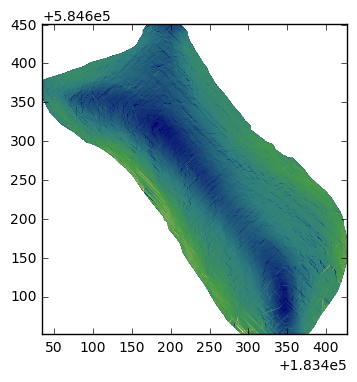

In [67]:
nrows, ncols = slope.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
# x0 = 0; 
# y0 = 0;
# x1 = x0 + dx * ncols
# y1 = y0 + dy * nrows
print "slope: dx={0}, dy ={1}, x0={2} , y0={3} ".format(dx, dy, x0, y0)

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

In [60]:
dy

-0.5

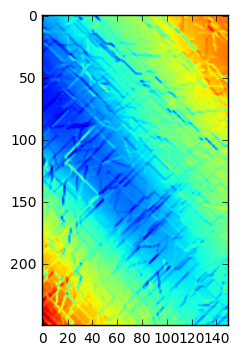

In [60]:
plt.imshow(slope[250:500, 350:500])

In [92]:
ds = gdal.Open("HillslopeOnlyVeg.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [93]:
np.unique(veg)

array([0, 1], dtype=uint8)

In [115]:
testveg = veg[2000:2250, 2000:2250]
Nx = testveg.shape[0]
Ny = testveg.shape[1]

In [122]:
f = open("../example_veg/ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('veg\n')
for i in range(Ny):
    for j in range(Nx):
        f.write(' {}\n'.format(str(testveg[i,j])))

In [120]:
np.unique(testveg)

array([0, 1], dtype=uint8)

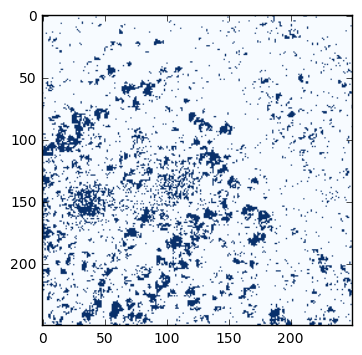

In [121]:
 plt.imshow(testveg, cmap = 'Blues')
# plt.imshow(veg[2000:2500, 2000:2500], cmap = 'Blues')

In [112]:
# veg = veg.astype(float)
# veg[veg == 0] = np.nan

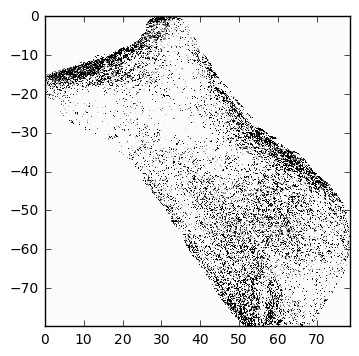

In [113]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(1-veg, cmap='gist_earth', extent=[x0, x1, y1, y0])


In [68]:
ds = gdal.Open("HillslopeClassification.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [69]:
veg = veg.astype(float)
veg[veg == 255] = np.nan

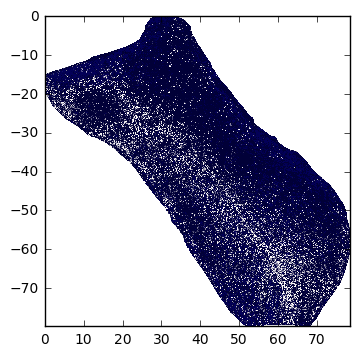

In [70]:
nrows, ncols = slope.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()  
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(veg, cmap='gist_earth', extent=[x0, x1, y1, y0])


[  0.   1.   2. ...,  nan  nan  nan]


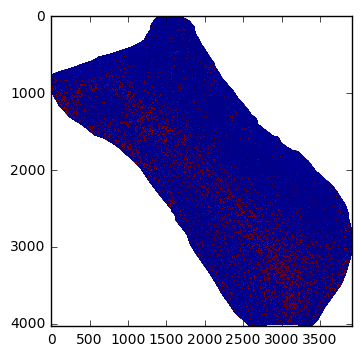

In [8]:

gtif = gdal.Open( "HillslopeClassification.tif" )
# A classification of the high resolution Orthophoto of lehavim.


ortho = np.asarray(gtif.GetRasterBand(1).ReadAsArray(), dtype = float)

ortho[ortho == 255] = np.nan
plt.imshow(ortho)
print np.unique(ortho)

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


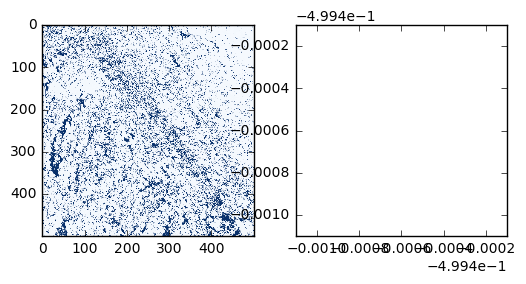

In [12]:
plt.subplot(121)
plt.imshow(ortho[2000:2500, 2000:2500], cmap = 'Blues')

plt.subplot(122)
plt.imshow(slope[2000:2500, 2000:2500], cmap = 'Blues')